In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family = font_name)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from imread import imread
from konlpy.tag import Twitter; twitter = Twitter()
from collections import Counter
import nltk

/Users/hyunginchoi/miniconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
prd_reviews = open('apmall_prd_reviews.txt', 'r')
reviews = prd_reviews.readlines()

In [4]:
sent = []
for re in reviews:
    if len(re) == 1:
        pass
    else:
        text_only = re.split(" | ")[5][:-1]
        sent.append(text_only)

# 필요없는 형태소 제거

In [5]:
result = []
rm_pos = ["Punctuation", "Josa", "Modifier", "KoreanParticle", "Suffix", "Determiner"]

for se in sent[:30]:
    tag = twitter.pos(se, norm = True, stem = True)
    im = [i for i in tag if i[1] not in rm_pos]
    result += im

In [6]:
words = []
for word in result:
    words.append(word[0])

In [7]:
fdist = nltk.FreqDist(words)
fdist_common = fdist.most_common()

In [8]:
rm_words = ['하다', '없다', '있다', '같다', '되다', '것', '해봤다', '써다', '거', '자다', '몰다', '수', '후', '이다']
top_words = []
for word, freq in fdist_common:
    if word not in rm_words:
        top_words.append(word)

In [9]:
text = " ".join(top_words[:200])
print(text)

좋다 토너 닦다 구매 사용 순하다 자극 이니스프리 괜찮다 저렴하다 피부 각질 제거 제품 너무 쓰다 토용 청보리 그냥 스킨 필링 구입 해주다 배송 보다 느낌 않다 무난 사다 토로 효과 쓰기 화장 솜 사보다 세안 용도 더 용량 평이 해보다 깔끔하다 맞다 아직 안 때 많다 케어 전혀 한번 많이 그렇다 개인 가볍다 적다 바르다 원래 ap 생각 도 싶다 보고 받다 해 내주다 알아보다 요 바로 적당하다 추천 맘 들다 기대하다 크다 믿다 아모레퍼시픽 상품 샘플 주다 암튼 행사 입소 이자 아이템 마침 중이 아침 저녁 랄 끄다 형 수분 공급 나서다 유 일단 용감 할인 무료 유명하다 듬뿍 묻히다 정돈 개운하다 간편하다 딱 노폐물 잔 여물 닦이다 정도 겨울 로션 없이 양 좀 비싸다 이번 기프트카드 자주 계속 결 늘 제일 중 왜 알다 정말 용기 부담 뚜껑 여 방식 편리하다 효능 딱하다 물 토라 대안 돈 아깝다 신분 기존 데 일리 템 와중 제 타입 부지 민감 겸용 역시 살다 빨 리뷰 왜냐면 빨리 오다 남다 겁나다 짱짱하다 잘쓰다 사 빠르다 주 출시 쟁겨놓 이제야 입 그래도 혹시 모르다 에센스 내 소중하다 중학생 딸 려고 이마 여드름 분기 무향 금방 건조하다 AP 감사하다 사람 그렇게 마 일드 나진 차갑다 토 거만 게 시 250 mL 무슨


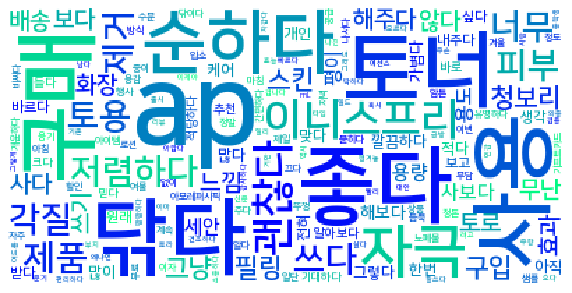

In [111]:
wordcloud = WordCloud(font_path='/Library/Fonts/NanumSquareBold.ttf',
                     max_font_size = 80,
                     background_color = 'white',
                      colormap = 'winter'
                     ).generate(text)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# plt.savefig('wordcloud_winter')
plt.close()

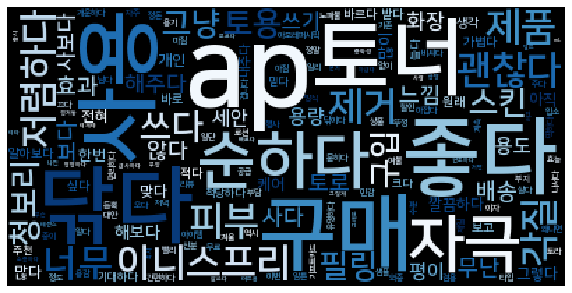

In [14]:
wordcloud = WordCloud(font_path='/Library/Fonts/NanumSquareBold.ttf',
                     max_font_size = 80,
                     background_color = 'black', 
                      colormap = 'Blues',
                     ).generate(text)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# plt.savefig('wordcloud_blues')
plt.close()